# Neccessary imports

In [50]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Function to show image

In [51]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[int(y[index])])

# Read image

In [52]:
data_dir = 'asl_dataset'
classes = ['0', '1', 'a', 'b', 'c']
X_train = []
y_train = np.array([])
for label in classes:
    y_train = np.append(y_train, [classes.index(label)]*len(os.listdir(f'{data_dir}/{label}')))

# print(y_train.shape)
for label in classes:
    for img in os.listdir(f'{data_dir}/{label}'):
        img = cv2.imread(f'{data_dir}/{label}/{img}')
        # X_train = np.append(X_train, [img])
        X_train.append(img)

# Split dataset into train and test

In [53]:
# convert builtin array to numpy array
X_train = np.array(X_train)
# use 20% of data for test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.02)

# Prepare CNN layers

In [54]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(400, 400, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train dataset

In [55]:
cnn.fit(X_train, y_train, epochs=2)

Epoch 1/2


2023-01-29 01:35:36.537010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 5s 445ms/step - loss: 907.6118 - accuracy: 0.4694
Epoch 2/2
11/11 [==============================] - 5s 460ms/step - loss: 0.9795 - accuracy: 0.9329


# Evaluate against test dataset

In [41]:
cnn.evaluate(X_test, y_test)

1/1 [==============================] - 0s 245ms/step - loss: 0.0000e+00 - accuracy: 1.0000


2023-01-29 01:32:09.537861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.0, 1.0]

# Show results

1/1 [==============================] - 0s 77ms/step


2023-01-29 01:35:50.390345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[4, 1, 0, 0, 0, 0, 2]


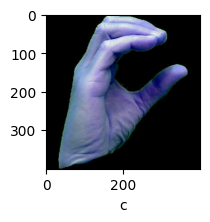

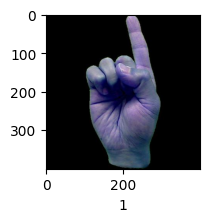

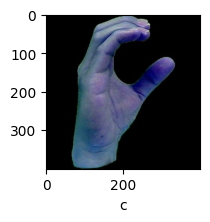

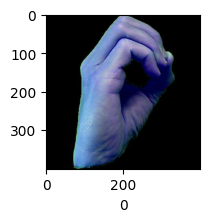

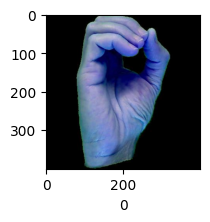

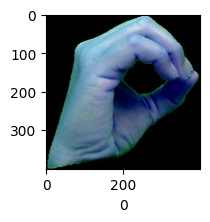

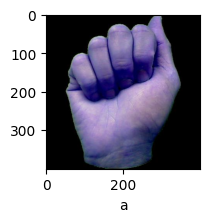

In [56]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(el) for el in y_pred]
print(y_classes)
for i in range(len(y_classes)):
    plot_sample(X_test, y_test, i)